In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np 
import pandas as pd
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.preprocessing.image import load_img

In [ ]:
import os
import PIL
import pathlib
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import preprocessing
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.python.ops.numpy_ops import np_utils

In [ ]:
BATCH_SIZE = 81
IMAGE_SIZE = 256
EPOCHS=15
CHANNELS=3

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory("/content/drive/MyDrive/The IQ-OTHNCCD lung cancer dataset",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 1037 files belonging to 3 classes.


In [ ]:
class_names = dataset.class_names
class_names

['Bengin cases', 'Malignant cases', 'Normal cases']

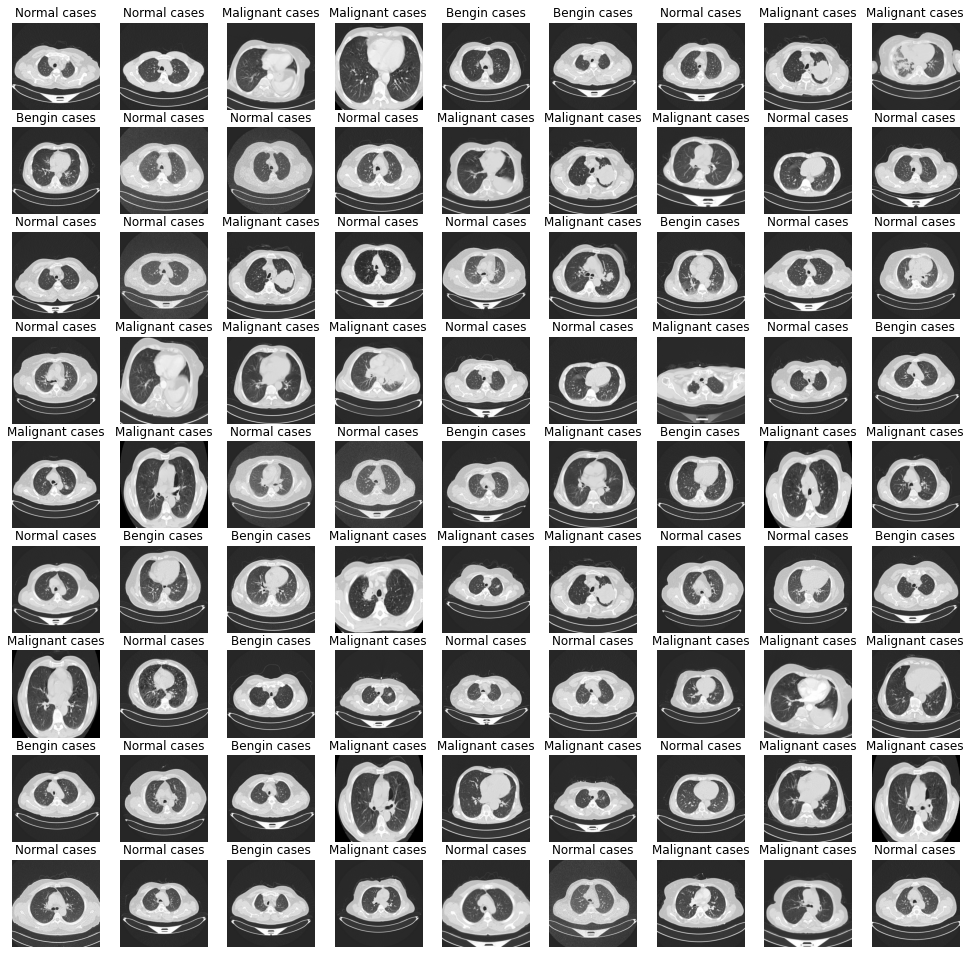

In [ ]:
plt.figure(figsize=(17, 17))
for image_batch, labels_batch in dataset.take(1):
    for i in range(BATCH_SIZE):
        ax = plt.subplot(9, 9, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [ ]:
def dataset_split(ds,shuffle=True, shuffle_size=10000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(0.8 * ds_size)
    val_size = int(0.2 * ds_size)
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    return train_ds, val_ds

In [ ]:
train_ds, val_ds = dataset_split(dataset)

In [ ]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [ ]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    # convolution and pooling layers
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])
model.build(input_shape=input_shape)

In [ ]:
np.array(train_ds)

array(<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
      dtype=object)

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_11 (Conv2D)          (81, 254, 254, 32)        896       
                                                                 
 max_pooling2d_11 (MaxPoolin  (81, 127, 127, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (81, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPoolin  (81, 62, 62, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (81, 60, 60, 64)         

In [ ]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS,
)

Epoch 1/15
10/10 [==============================] - 105s 10s/step - loss: 0.9661 - accuracy: 0.5000 - val_loss: 0.9689 - val_accuracy: 0.3765
Epoch 2/15
10/10 [==============================] - 106s 10s/step - loss: 0.9538 - accuracy: 0.4654 - val_loss: 0.9324 - val_accuracy: 0.5556
Epoch 3/15
10/10 [==============================] - 101s 10s/step - loss: 0.9262 - accuracy: 0.5252 - val_loss: 0.9089 - val_accuracy: 0.5062
Epoch 4/15
10/10 [==============================] - 100s 10s/step - loss: 0.8743 - accuracy: 0.5970 - val_loss: 0.7767 - val_accuracy: 0.7346
Epoch 5/15
10/10 [==============================] - 101s 10s/step - loss: 0.7733 - accuracy: 0.6990 - val_loss: 0.6657 - val_accuracy: 0.7160
Epoch 6/15
10/10 [==============================] - 101s 10s/step - loss: 0.6556 - accuracy: 0.7393 - val_loss: 0.6544 - val_accuracy: 0.7099
Epoch 7/15
10/10 [==============================] - 101s 10s/step - loss: 0.5996 - accuracy: 0.7657 - val_loss: 0.4919 - val_accuracy: 0.8148
Epoch 

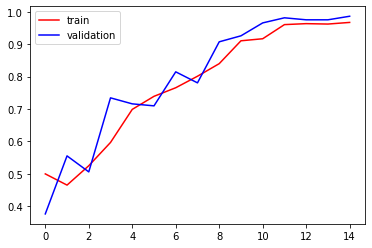

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

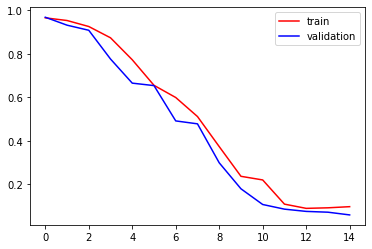

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

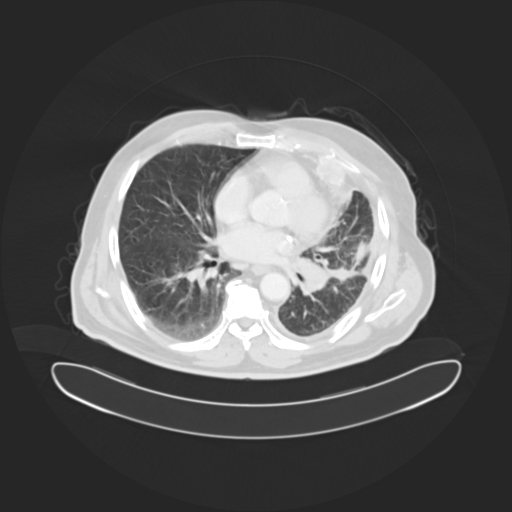

In [30]:
image_path = "/content/drive/MyDrive/TEST_data/Malignant case (558).jpg"
image = preprocessing.image.load_img(image_path)
image_array = preprocessing.image.img_to_array(image)
scaled_img = np.expand_dims(image_array, axis=0)
image

In [31]:
pred = model.predict(scaled_img)

1/1 [==============================] - 0s 303ms/step


In [34]:
print(pred)

[[7.8424776e-04 9.9749100e-01 1.7247569e-03]]


In [32]:
output = class_names[np.argmax(pred)]
output

'Malignant cases'

In [38]:
from keras.models import load_model

In [53]:
model.save('/content/drive/MyDrive/trained_model/lungs cancer classification.h5') 